In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1 )

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df['year']=pd.to_numeric(df['year'], errors='coerce')

In [5]:
df.shape

(246, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         244 non-null    float64
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
dtypes: float64(1), object(13)
memory usage: 27.0+ KB


In [34]:
df.duplicated().sum()

0

no duplicates in the data 

In [35]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [36]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [37]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [39]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [41]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [44]:
df=df.dropna().reset_index(drop=True)

In [45]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [47]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [51]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [63]:
df=df.drop(122).reset_index(drop=True)

In [64]:
df[['month', 'day', 'year', 'Temperature']] = df[['month', 'day', 'year', 'Temperature']].astype(int)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          241 non-null    int64 
 1   month        241 non-null    int64 
 2   year         241 non-null    int64 
 3   Temperature  241 non-null    int64 
 4    RH          241 non-null    object
 5    Ws          241 non-null    object
 6   Rain         241 non-null    object
 7   FFMC         241 non-null    object
 8   DMC          241 non-null    object
 9   DC           241 non-null    object
 10  ISI          241 non-null    object
 11  BUI          241 non-null    object
 12  FWI          241 non-null    object
 13  Classes      241 non-null    object
 14  Region       241 non-null    int64 
dtypes: int64(5), object(10)
memory usage: 28.4+ KB


In [66]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
237,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
238,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
239,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [67]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [68]:
df.columns=df.columns.str.strip()

In [69]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [70]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    float64
 5   Ws           241 non-null    float64
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 28.4+ KB


In [78]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [82]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,241.000000,241.000000,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,15.879668,7.514523,2012.0,32.161826,61.958506,15.518672,0.749793,78.020332,14.780913,49.774689,4.776763,16.805394,7.092116,1.493776
std,8.782442,1.110929,0.0,3.640449,14.861525,2.809334,2.000607,14.274480,12.395199,47.712892,4.154190,14.231143,7.445187,0.501002
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.600000,5.800000,14.700000,1.400000,6.100000,0.800000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.400000,3.500000,12.500000,4.700000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,74.000000,17.000000,0.500000,88.300000,20.900000,71.000000,7.300000,22.900000,11.600000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [83]:
correlation=df.corr()

In [95]:
import matplotlib.rcsetup as plit

<AxesSubplot: >

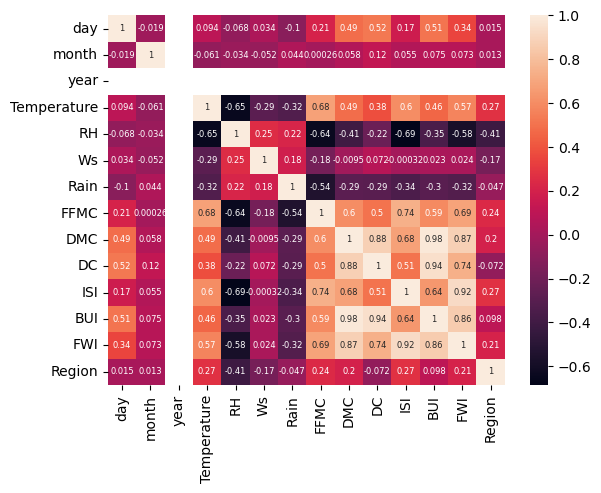

In [117]:
sns.heatmap(correlation, annot=True ,annot_kws={'size': 6}  )


In [118]:
df.Classes.value_counts()

fire             131
not fire          99
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [119]:
df.Classes = df.Classes.str.strip()

In [120]:
df.Classes.value_counts()

fire        137
not fire    104
Name: Classes, dtype: int64

region 1 

In [121]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54.0,11.0,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66.0,11.0,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47.0,14.0,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80.0,16.0,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


region 2

In [122]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,3,6,2012,29,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
123,4,6,2012,30,64.0,14.0,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
124,5,6,2012,32,60.0,14.0,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
125,6,6,2012,35,54.0,11.0,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
126,7,6,2012,35,44.0,17.0,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,26,9,2012,30,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
237,27,9,2012,28,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
238,28,9,2012,27,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
239,29,9,2012,24,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [127]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED2.csv')

# now we have completed the cleaning procedure

## now let us take visualed observations from it 